In [30]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
processed_data_path = '../data/processed'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [31]:
file_list

['../data/raw\\1_2_3_studio.csv',
 '../data/raw\\2025-05-05_20-05_1_2_3_studio.csv']

In [32]:
main_dataframe = pd.read_csv(file_list[0], delimiter=',')
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i], delimiter=',') 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 
main_dataframe.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315685683/,Москва,sale,flat,8,10,3,142.6,-1,0,174314168,Басманный,Казарменный переулок,3,Курская,Дом на Покровском бульваре
1,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253213/,Москва,sale,flat,30,79,1,78.0,-1,0,92880000,Пресненский,1-й Красногвардейский проезд,22с1,Москва-Сити,NEVA TOWERS
2,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/314440236/,Москва,sale,flat,2,10,2,69.4,-1,0,69900000,Тверской,Палиха,4,Менделеевская,Клубный дом Maison Rouge
3,MOD Estate,real_estate_agent,https://www.cian.ru/sale/flat/310829334/,Москва,sale,flat,5,21,3,99.6,-1,0,44000000,Щукино,Щукинская,3,Стрешнево,Интонация
4,Владислав Карпов,realtor,https://www.cian.ru/sale/flat/315941840/,Москва,sale,flat,4,15,3,103.0,-1,0,82500000,Хорошево-Мневники,Нижние Мневники,9,Терехово,Остров


In [33]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')
new_dataframe.head()

,total_meters,price
url_id,,
315685683,142.6,174314168
315253213,78.0,92880000
314440236,69.4,69900000
310829334,99.6,44000000
315941840,103.0,82500000


In [34]:
new_dataframe.to_csv(f"{processed_data_path}/train_data.csv")

<Axes: >

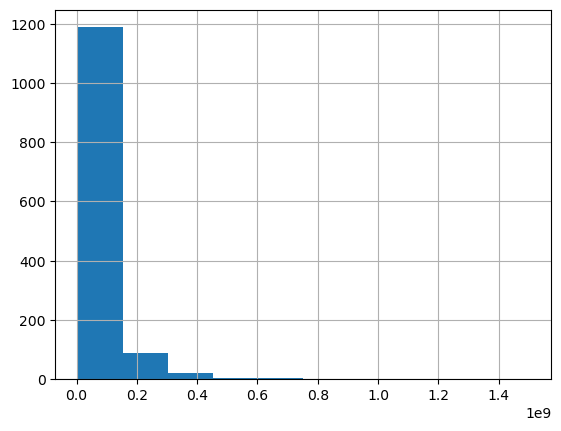

In [35]:
new_dataframe['price'].hist()

In [36]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]

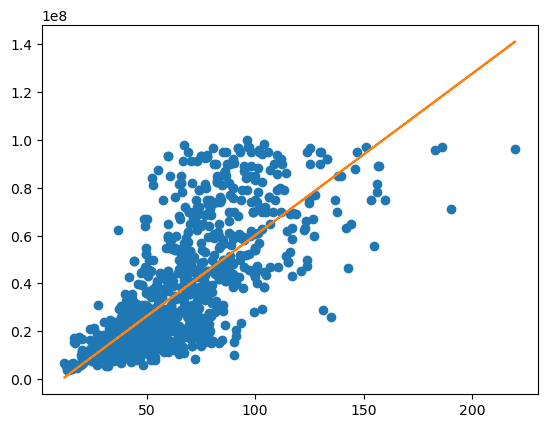

In [37]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)